# El tratamiento de las variables categóricas

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [21]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [22]:
df.count()

Transaction ID      2362
Age                 2362
 Items              2362
Monthly Income      2362
Transaction Time    2362
Record              2362
Gender              2362
City Tier           2362
Total Spend         2362
dtype: int64

In [23]:
# VEMOS QUE LA VARIABLE GENDER Y City Tier sons categoricas y no podemos aplicar el modelo lineal como tal
#GENERAMOS VARIABLES DUMMIES PARA CADA UNA DE LAS CATAGORICAS.
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [24]:
#lAS DUMMIES DE GENDER
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [25]:
#lAS DUMMIES DE TIER
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [26]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [27]:
#AÑADIMOS AL DF LAS DUMMIES DE GENDER
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [28]:
#AÑADIMOS AL DF LAS DUMMIES DE CITY TIER
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [29]:
# LISTA CON LAS VARIABLER PREDICTORAS
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [30]:
#APARTIR DE AQUI PREPARAMOS EL MODELO. QUEREMOS VER COMO AFECTAN CIERTAS VARIABLES AL GASTO TOTAL (Total Spend)
# X VARIABLES PREDICTORAS
X = df_new[feature_cols]
# Y VARIABLE A PREDECIR
Y = df_new["Total Spend"]

In [31]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [33]:
# MUESTRA CADA VARIABLE CON SUS COEFICIENTES
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [34]:
# FACTOR DE R^2
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:

La formula general sería
* ***Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648**

* La formula para cada caso, en este caso 6 que sería el producto cartesiano de Male y Female con City1, city2 y city3:

    * **Si es hombre y vive en CT1**: Total_Spend = **128.37220896466724** + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    
    * **Si es hombre y vive en CT2**: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    
    * **Si es hombre y vive en CT3**: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    
    * **Si es mujer y vive en CT1**: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    
    * **Si es mujer y vive en CT2**: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    
    * **Si es mujer y vive en CT3**: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [48]:
# ESTE ES DEL PRIMER CASO EN EL QUE SE RESUELVEN EL A+B DE CADA
# UNA DE LAS VARIABLES GENDER Y CITY_TIER EN ESTE CASO Gender_Male y CITY_TIER_1 VALIENDO AMBAS 1 SE MULTIPLICA POR SU
# COEFICIENTE: a= -79.41713030137362
#             'Gender_Male'= (1)* 131.0250132555456
#             'City_Tier= (1)* 76.76432601049527
# lOS DEMÁS VALORES DE LAS DUMMIES CATEGORICAS NO SE APLICAN POR QUE SON 0 Y POR LO TANTO SE ANULAN SU VALOR
# ASÍ SE HARÍA PARA CADA UNO DE LOS 6 CASOS QUE HAY APLICANDO LAS VARIABLES DUMMIES CORRESPONDIENTES

-79.41713030137362 + 131.0250132555456+ 76.76432601049527 

128.37220896466724

In [35]:
 -79.41713030137362 + 131.0250132555456-131.9033003197278

-80.29541736555583

In [36]:
#APLICAMOS LA FORMULA DEL MODELO PARA INCORPORARLO COMO LA COLUMNA "prediction".
# ESTA ES LA OPCIÓN MANUEAL DE CALCULARLO AL FINAL DEL APARTADO LO HACEMOS TAMBÍEN lm.predict() de sktlearn
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [37]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [38]:
#CALCULO DEL CUADRADO DE LOS ERRORES
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [39]:
SSD

1517733985.3408163

In [40]:
# DESVIACIÓN TIPICA DEL ERROR
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [41]:
RSE

803.1318809818165

In [42]:
sales_mean=np.mean(df_new["Total Spend"])

In [43]:
sales_mean

6163.176415976714

In [46]:
# PORCENTAJE DEL ERROR SOBRE LA MEDIA DE GASTO
error = RSE/sales_mean

In [47]:
error*100

13.031135680294161

### VAMOS A CALCULAR EL MODELO PERO UTILIZANDO YA DE FORMA DIRECTA CON lm.predict()

In [49]:
# AQUI LA LIBRERIA YA NOS CALCULA LA PREDICCIÓN CON LOS DATOS QUE LE CARGAMOS ANTES CON LAS VARIABLES PREDCTORAS
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [50]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [51]:
#VOLVEMOS A CALCULAR LA SUMA DE LOS CUADRADOS DE LOS ERRORES

SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.3408163

In [52]:
#AHORA VOLVEMOS A CALCULAR LA DESVIACIÓN TIPICA DEL ERROR O RSE
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [54]:
#VOLVEMOS A CALCULAR LA MEDIA DE LAS VENTAS PARA VER QUE POCENTAJE HAY DE ERROR SOBRE LAS MEDIAS DE NUESTRO MODELO
spend_mean = np.mean(df_new["Total Spend"])
spend_mean

6163.176415976714

In [55]:
PORCENTAJE_ERROR = (RSE/spend_mean)*100
PORCENTAJE_ERROR

13.031135680294161

## Eliminar variables dummy redundantes

In [63]:
#LA EXPLIACIÓN PARA QUITAR VARIABLES DUMMIES DE LAS QUE NOS GENERAN ES DEBIDO A LA EXPLICACIÓN TEÓRICA
#EN LA QUE SE INDICA QUE LAS VARIABLES CATEGORICAS SE REPRESENTAN CON N-1 VARIABLES DUMMIES, 
#SIENDO N EL NÚMERO DE CATEGORÍAS. LA VENTAJA DE ESTO ES QUE REDUCIMOS CASOS. HABRÁ UNA CATEGORÍA QUE SE EXPLIQUE
#POR LA NO EXISTENCIA DE VARIABLE DUMMIE.

In [64]:

dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [65]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [66]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


POR EJEMPLO LA PRIMERA FILA EN EL QUE AHORA TODOS LOS VALORES DUMMIES SON 0 REPRESENTA A UNA FEMALE QUE VIVE EN CITY_TIER_1
SE PUEDE VER MÁS ARRIBA. ESTE SERÍA EL **CASO BASE** :
* **FEMALE Y CITY_TIER_1** QUE NO TENDRÍA COEFICIENTES DE NINGUNA VARIABLE DUMMIE

In [71]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(lm.intercept_)

-133.67781754642238


In [73]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [75]:
lm.score(X,Y)# CALCULO DEL R^2

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

# Transformación de variables para conseguir una relación no lineal

In [76]:
import pandas as pd

In [77]:
# EJEMPLO DE CONSUMO DE COCHES EN MILLAR Y GALONES DE GASOLINA
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [78]:
data_auto.shape # NOS MUESTRA FILA Y COLUMNAS.

(406, 9)

In [79]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

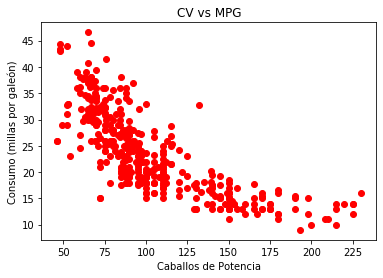

In [80]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [81]:
#SE OBSERVA QUE LA GRÁFICA NO ES EN SI UNA LINEA SINO QUE TIENE FORMA DE CURVA POR LO QUE LA REGRESIÓN 
#PODRÁ SER EXPONENCIAL O BIEN CUADRÁTICA EN FORMA PARÁBOLA. AÚN ASÍ LA INTENTAREMOS AJUSTAR A UN MODELO LINEAL A VER COMO VA.

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [82]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
# NECESITAMOS GENERAR UN ARRAY YA QUE ES SOLO UNA COLUMNA Y ENTONCES ES DEL TIPO SERIE.
X_data = X[:,np.newaxis]

In [83]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
type(X)

pandas.core.series.Series

In [85]:
type(X_data)

numpy.ndarray

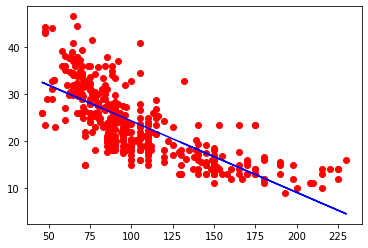

In [86]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [87]:
lm.score(X_data, Y) # CALCULO DEL R^2

0.574653340645025

In [88]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2 

In [89]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [90]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lm.score(X_data, Y)# CALCULO DEL R^2

0.4849887034823205

In [92]:
#VEMOS QUE R^2 ES MÁS BAJO QUE EL ANTERIOR POR LO QUE NO PARECE QUE MEJORE.

In [93]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

In [94]:
#VEMOS QUE EL % ERROR ES MÁS ALTO POR LO QUE NO PARECE QUE MEJORE.

### Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [96]:
poly = PolynomialFeatures(degree=2)# POLINOMIO DE GRADO 2

In [97]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [98]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lm.score(X_data, Y) #CALCULO R^2 PARECE QUE MEJORA

0.6439066584257469

In [100]:
lm.intercept_

55.02619244708036

In [101]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

**La ecuación podría quedarnos así**
mpg = 55.026 -0.434 * hp + 0.00112615 * hp^2

In [137]:
#PODRIAMOS PROBAR CON MÁS GRADOS DE POLINOMIO PARA VER SI NOS MEJORA 
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.026192447080355
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
Regresión de grado 3
R2:0.6444678885560742
58.44877411191809
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428552, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
Regresión de grado 4
R2:0.6467674189704502
40.096643850138875
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
Regresión de grado 5
R2:0.6547512490679683
-40.693829800815294
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621368e-04
 -2.36220932e-06  3.41982976e-09]
SSD: 8373.171390452659, RSE: 4.546921734577904, Y_mean: 23.51457286432162, error: 19.336612069517507%
Regresión de grado 6
R2:0.6572895595307906
-157.068005372335

In [134]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [122]:
print(regresion_validation(lm, X_data, Y))

None


# El problema de los outliers

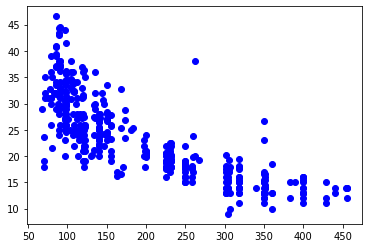

In [111]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "bo")

In [112]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
lm.score(X,Y) #CALCULAMOS EL R^2

0.6261049762826918

In [115]:
import statsmodels.formula.api as smf # IMPORTAMOS ESTE PAQUETE PARA HACER LA REGRESIÓN LINEAL. ES LA OTRA LIBRERIA DISTINTA
lm = smf.ols(formula="mpg~displacement", data=data_auto).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.66e-91
Time:                        18:43:33   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000      34.208      36.142
displacement    -0.0603      0.002    -26.926      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

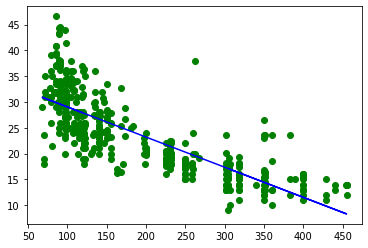

In [114]:
%matplotlib inline
plt.plot(X,Y, "go")
plt.plot(X, lm.predict(X), color="blue")

In [116]:
#VIENDO LA  GRÁFICA ESTIMAMOS QUE ESTOS SON LOS CRITERIOS PARA ENCONTRAR EL OUTLIER
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [117]:
# ESTOS SERÍAN LOS OTROS OUTLIERS CALCULANDO A OJO LOS CRITERIOS MIRANDO LA GRÁFICA
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [118]:
#ELIMINAMOS LOS OUTLANDERS
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [119]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
lm.score(X,Y)

0.6466514317531822

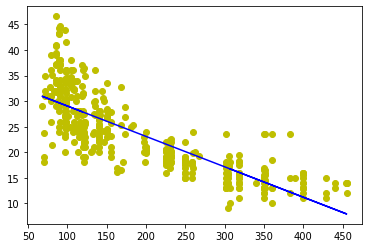

In [121]:
%matplotlib inline
plt.plot(X,Y, "yo")
plt.plot(X, lm.predict(X), color="blue")

In [ ]:
#LOS BOXPLOT SIRVEN TAMBIÉN MUY BIEN PARA DETECTAR LOS OUTLIER.